# Alucar - Analisando as vendas

In [181]:
import pandas as pd

In [182]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [183]:
alucar = pd.read_csv('alucar.csv')

In [184]:
print('Quantidade de linhas e colunas', alucar.shape)

Quantidade de linhas e colunas (24, 2)


In [185]:
print('Quantidade de dados nulos:', alucar.isna().sum())

Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [186]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [187]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [188]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [189]:
!pip install seaborn==0.9.0
%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='mes', ylabel='vendas'>

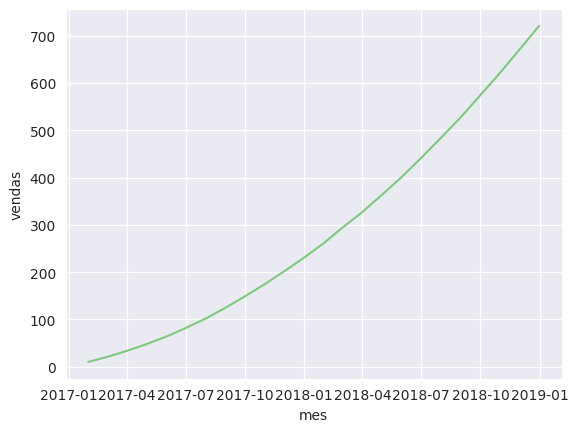

In [190]:
sns.lineplot(x='mes', y='vendas', data=alucar)

<Axes: xlabel='mes', ylabel='vendas'>

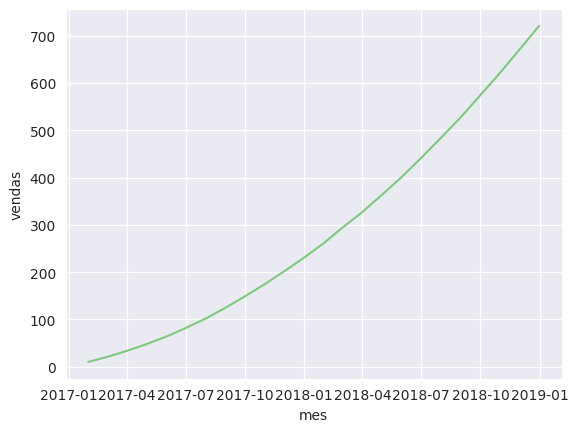

In [191]:
sns.set_palette('Accent') # paleta de cores
sns.set_style('darkgrid') # grid para marcação de linhas
sns.lineplot(x='mes', y='vendas', data=alucar)

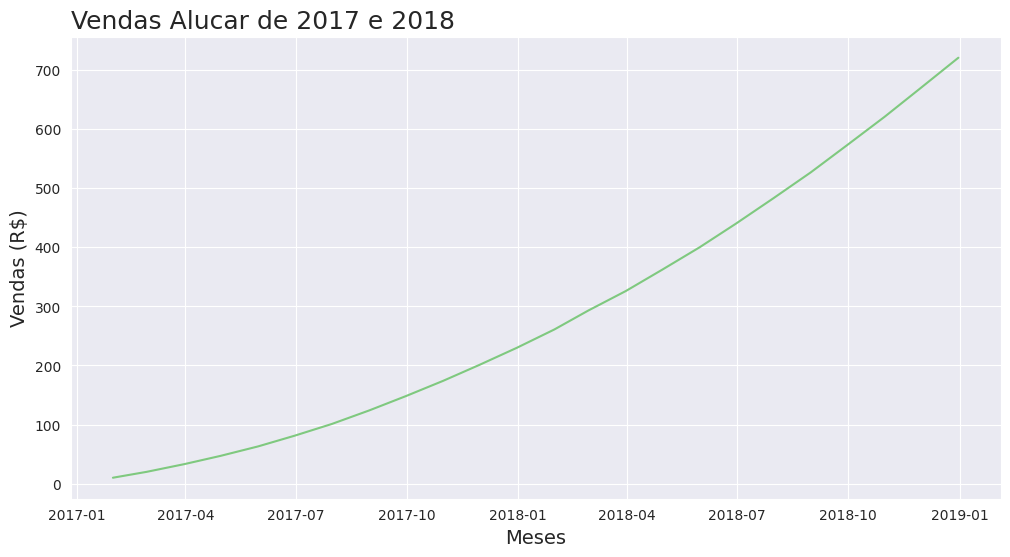

In [192]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [193]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


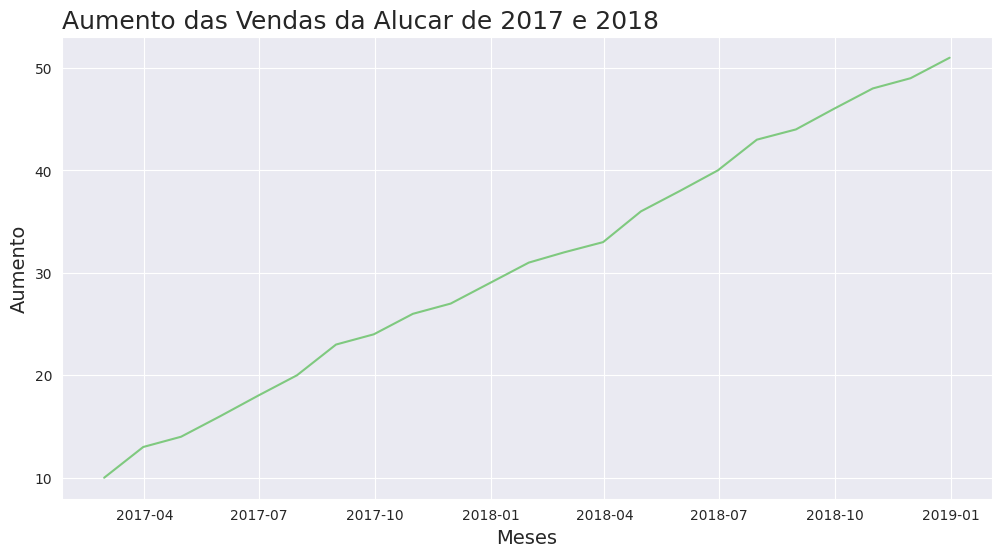

In [194]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [195]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

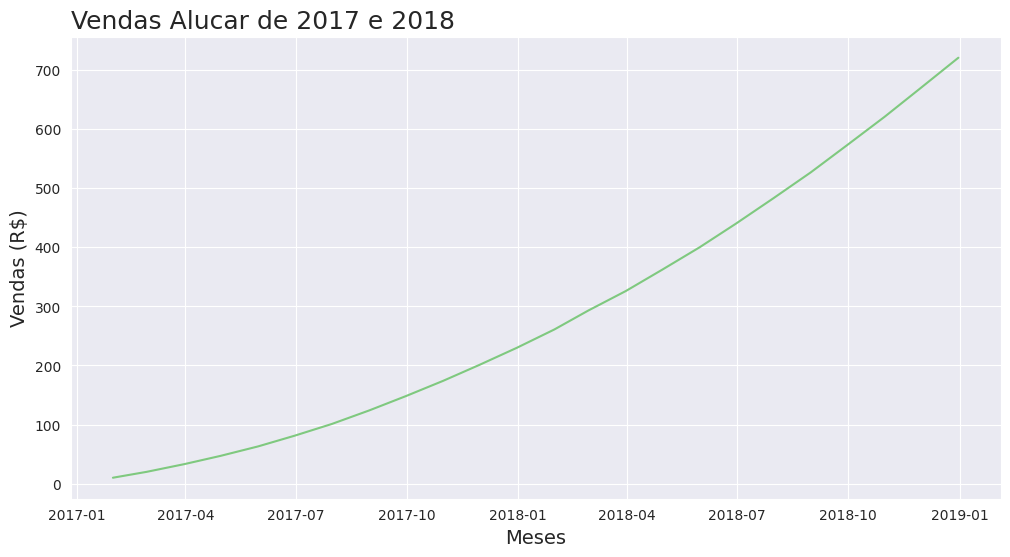

In [196]:
plotar('Vendas Alucar de 2017 e 2018', 'Meses', 'Vendas (R$)', 'mes', 'vendas', alucar)

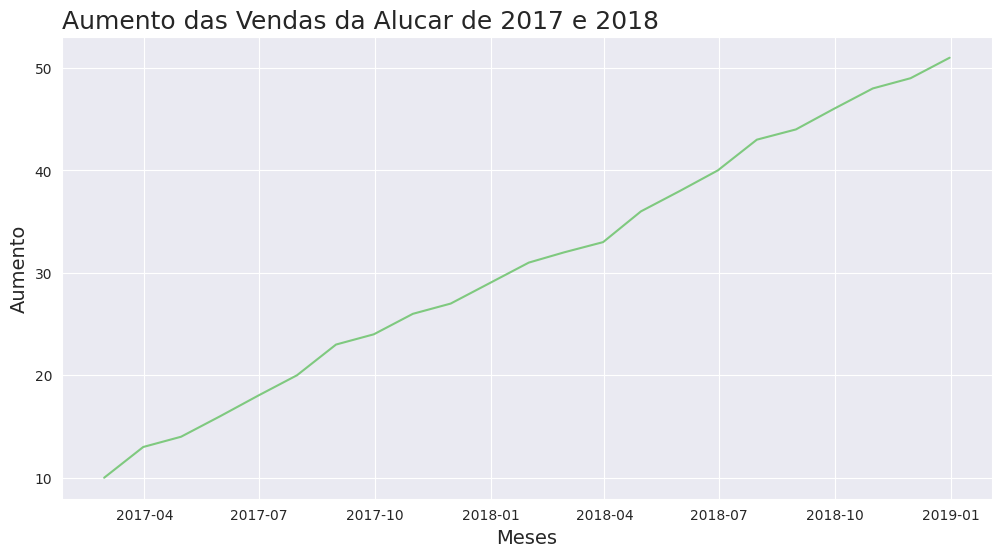

In [197]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar)

In [198]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


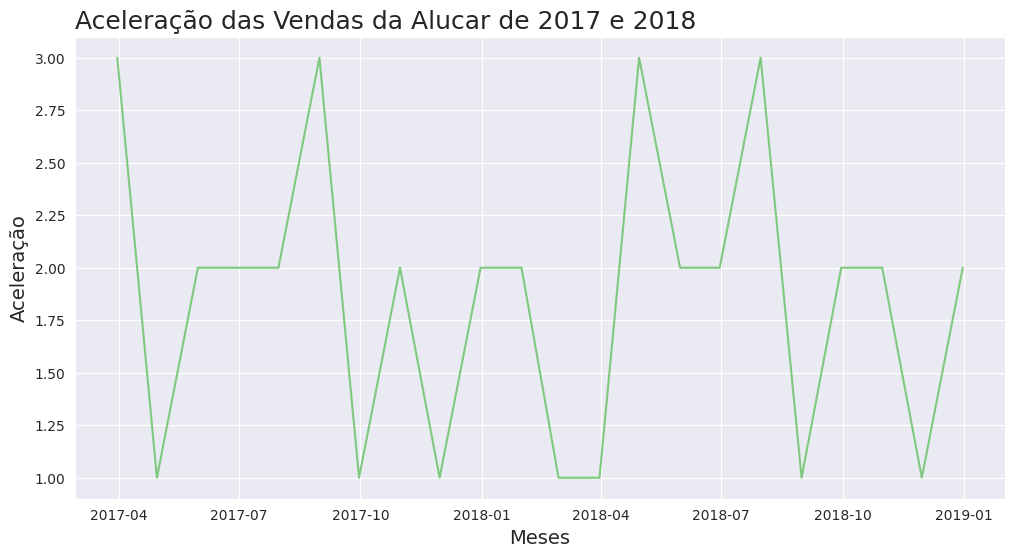

In [199]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aceleração', 'mes', 'aceleracao', alucar)

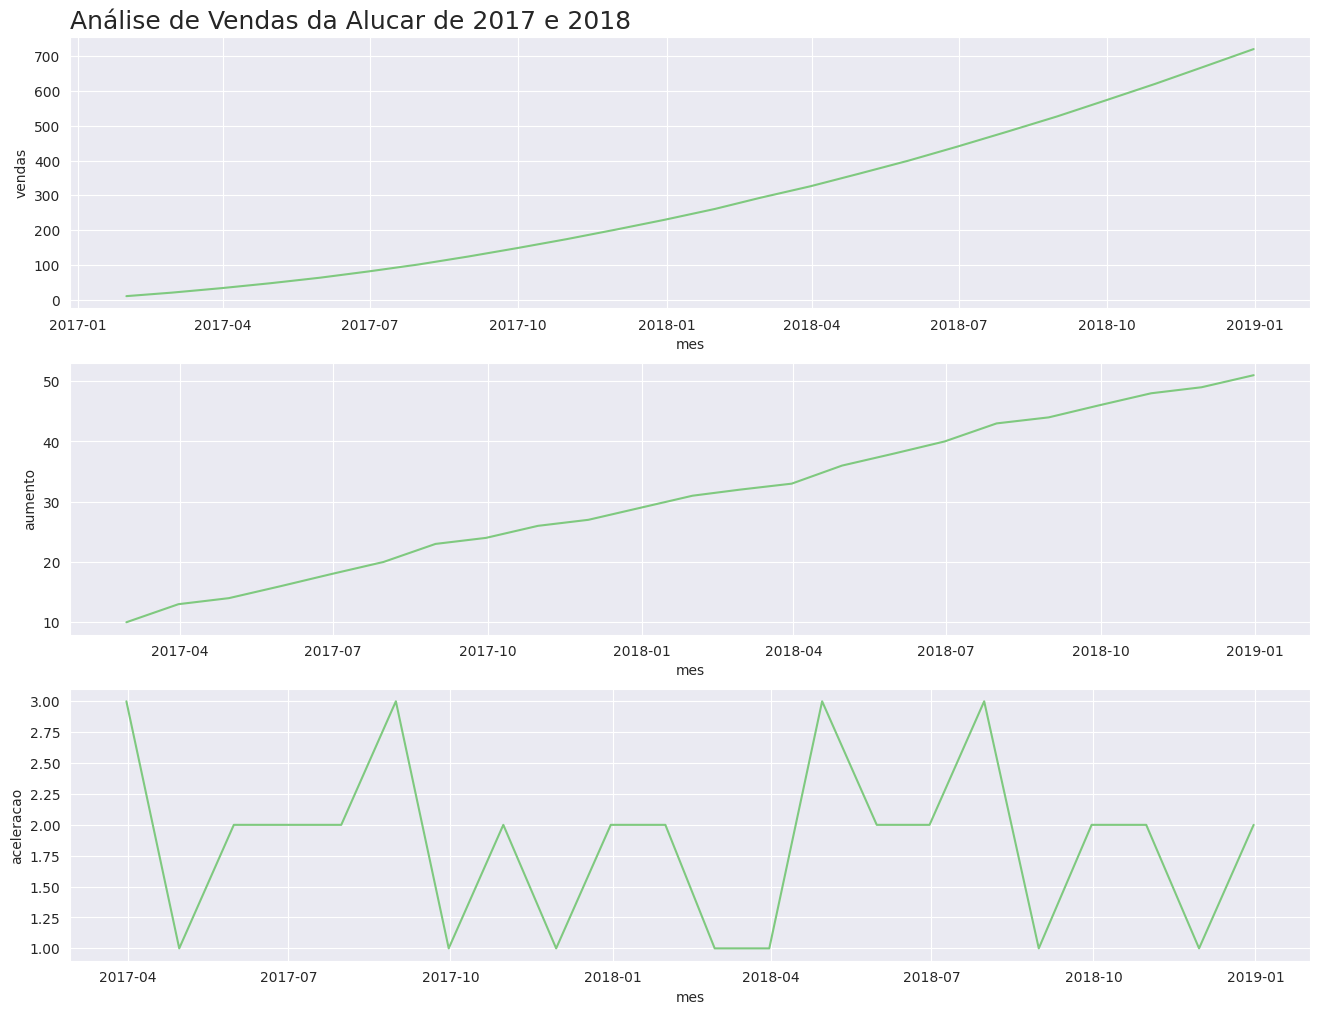

In [200]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3, 1, 2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3, 1, 3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [201]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize=18, loc='left')
  ax = sns.lineplot(x=x, y=y1, data=dataset)
  ax = plt.subplot(3, 1, 2)
  ax = sns.lineplot(x=x, y=y2, data=dataset)
  ax = plt.subplot(3, 1, 3)
  ax = sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

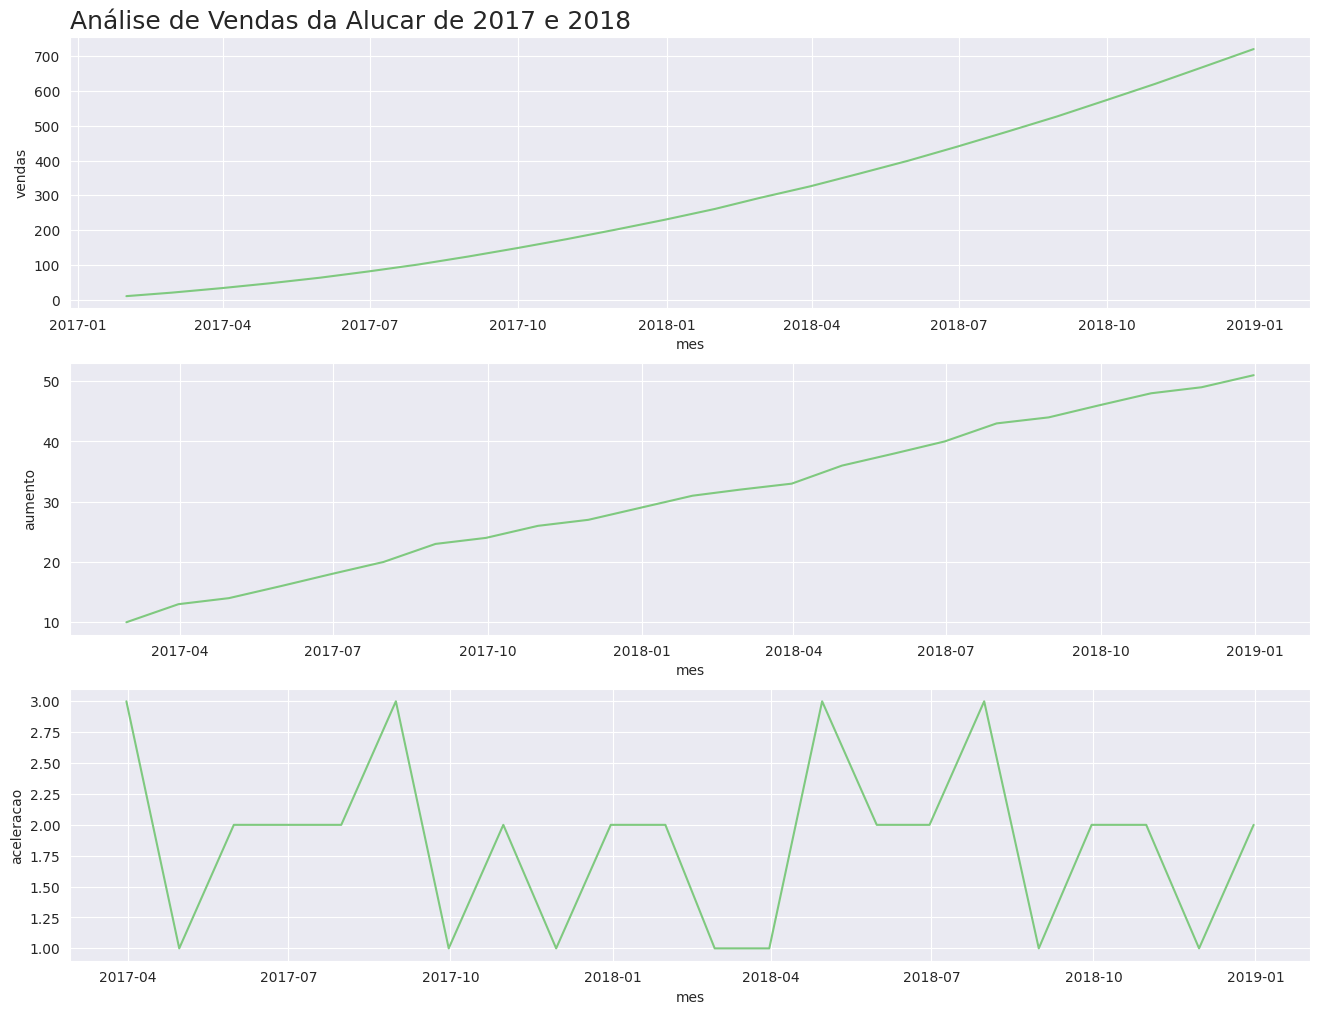

In [202]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas da Alucar de 2017 e 2018')

# Nível de Correlação

In [203]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

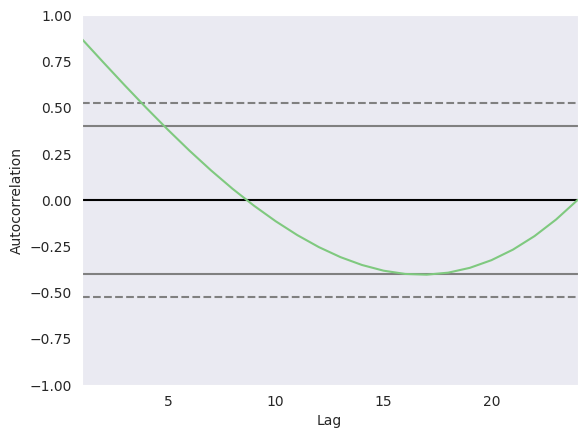

In [204]:
autocorrelation_plot(alucar['vendas'])

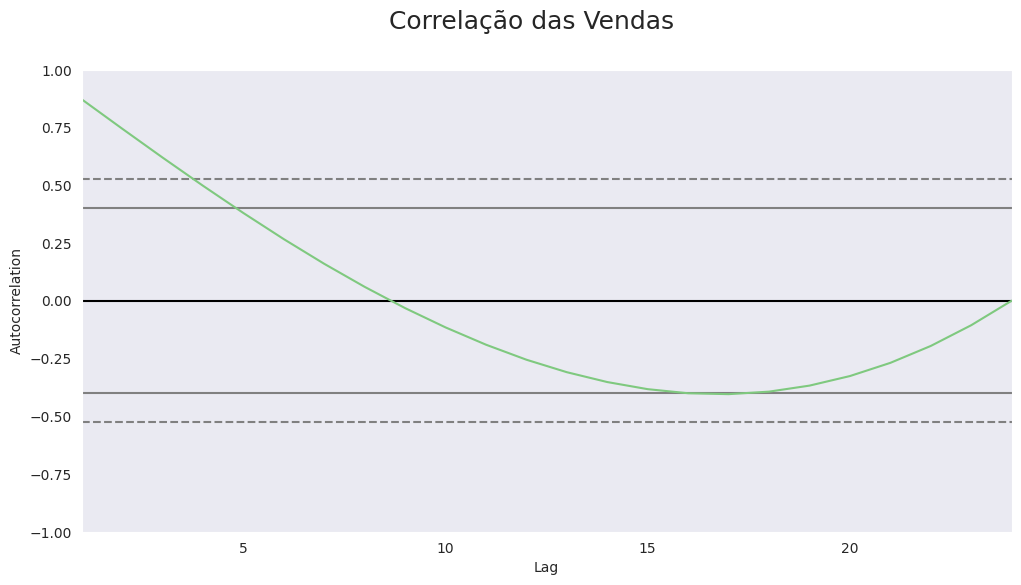

In [205]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Vendas', fontsize=18)
autocorrelation_plot(alucar['vendas'])
ax = ax

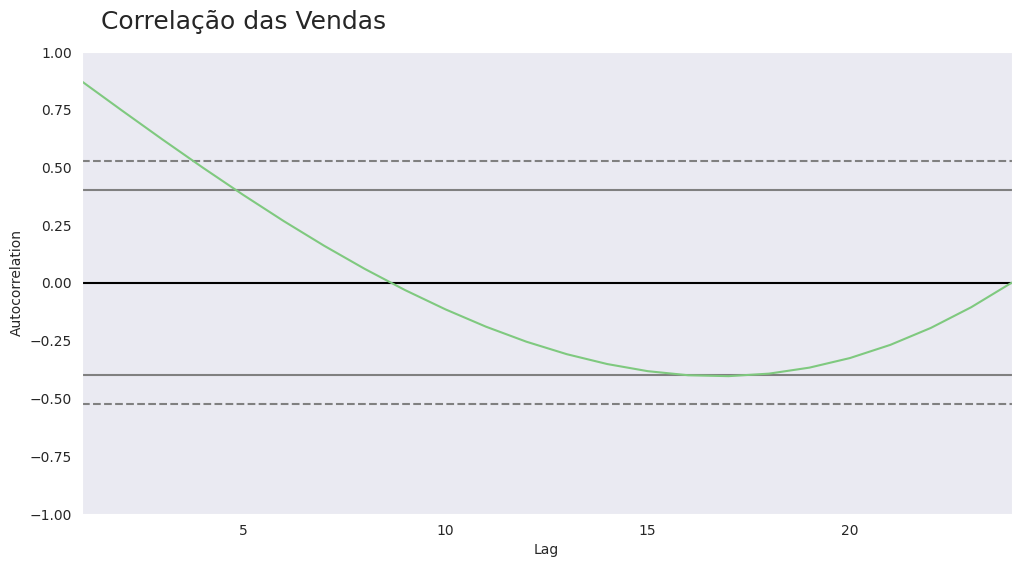

In [206]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

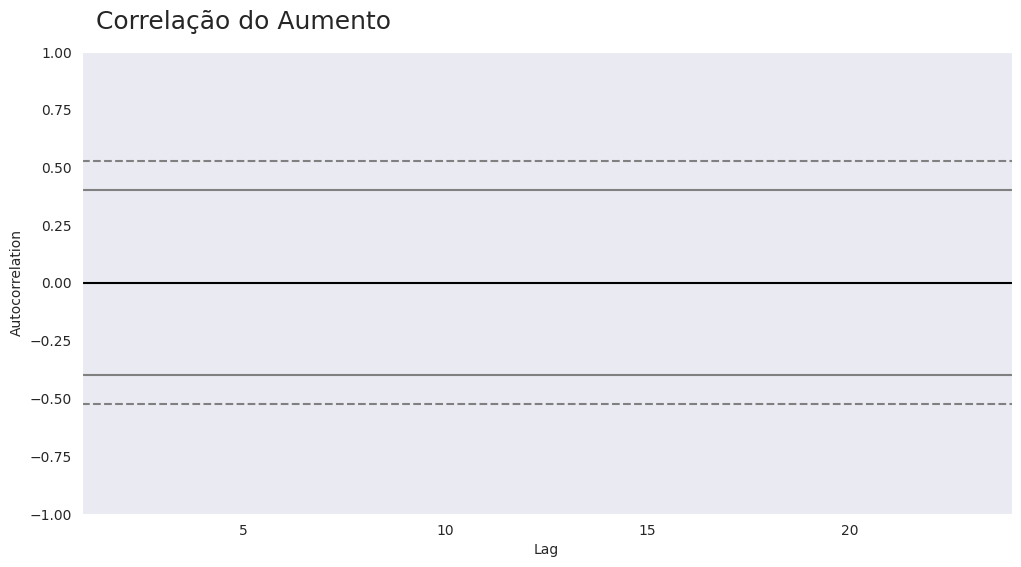

In [207]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'])
ax = ax

**OBS: Índice de início de acordo com os valores abaixo (valores nulos não são refletidos no gráfico de correlação):**

aumento inicia no índice 1

acerecacao inicia no índice 2

In [208]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


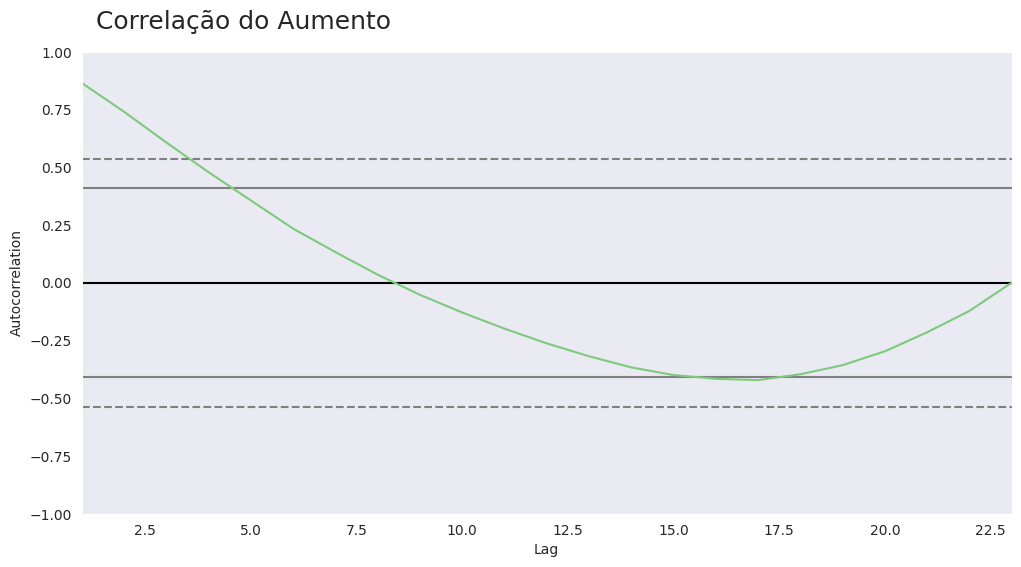

In [209]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

**Obs: Com o valor 1, dizemos que existe uma correlação perfeita positiva e -1, uma correlação perfeita negativa.**

**Quanto mais próximo do valor 1 ou -1, dizemos que temos uma correlação forte, sendo que o valor de autocorrelação 0 indica uma correlação nula.**

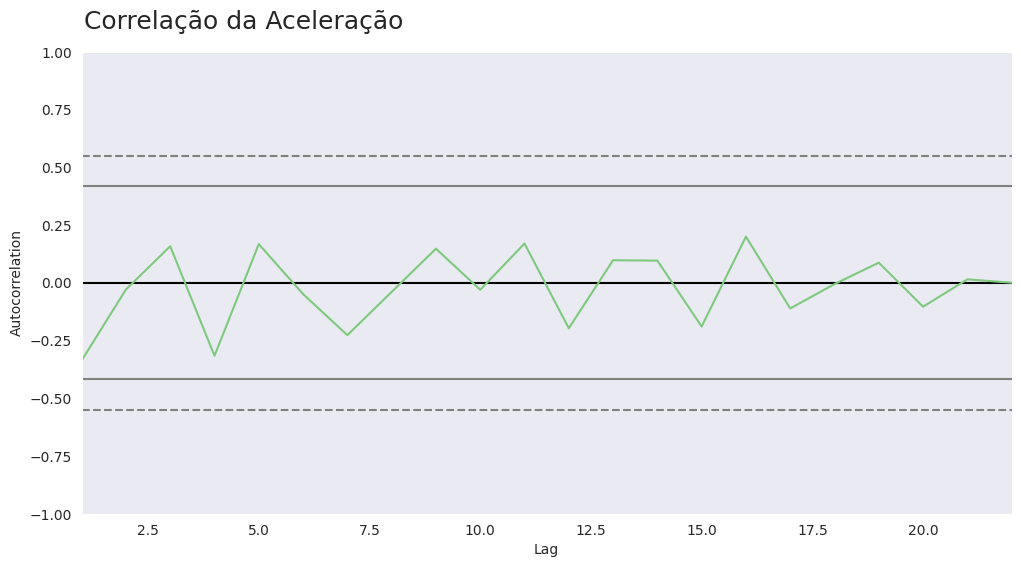

In [210]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando os Assinates da Newsletter

In [211]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [212]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [213]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [214]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [215]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


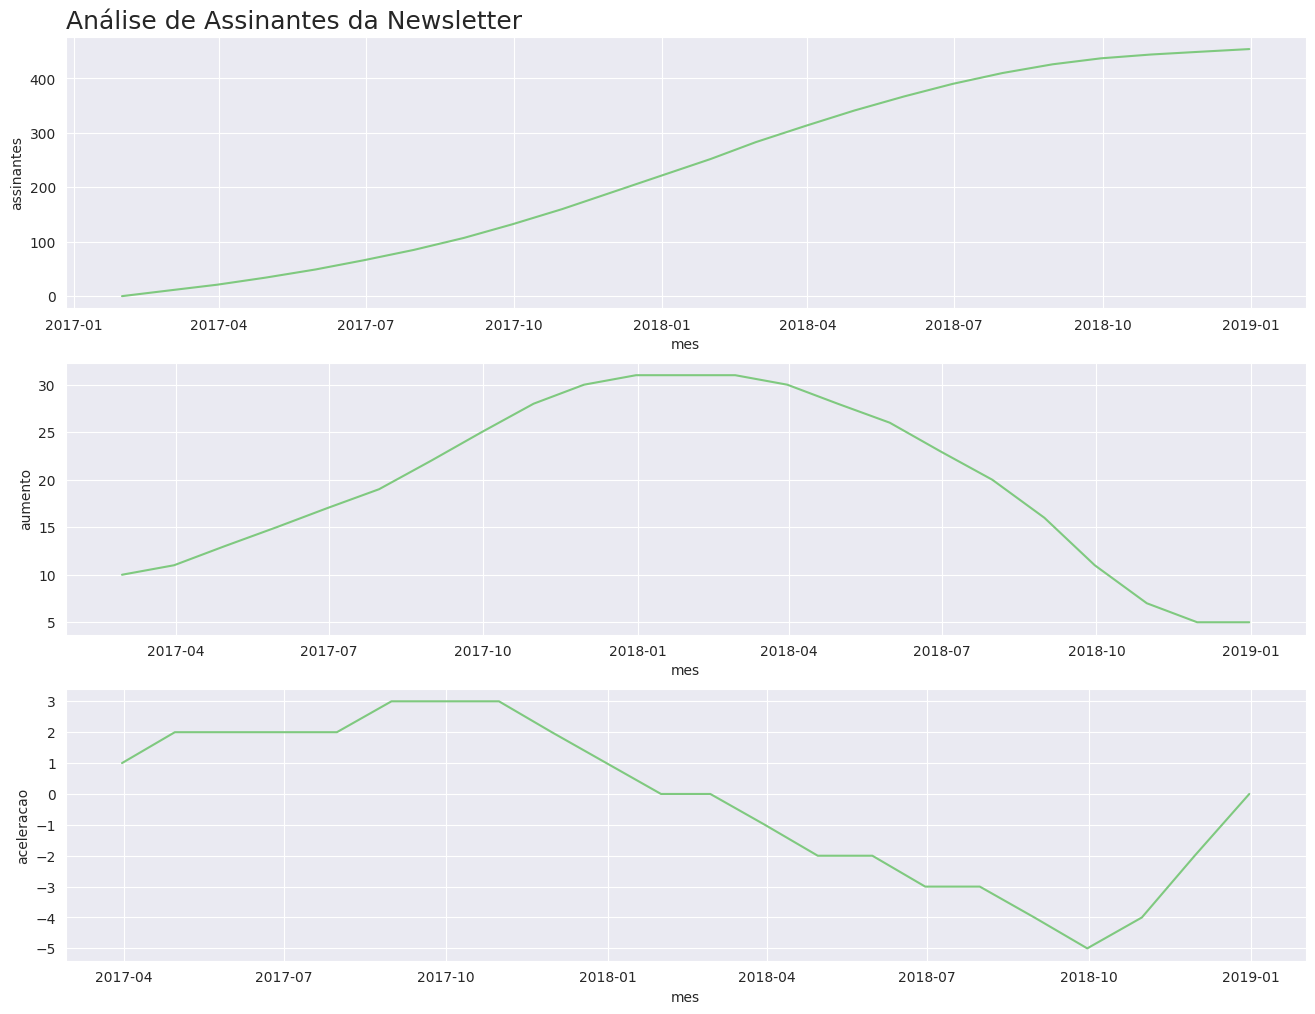

In [216]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da Newsletter')

# Chocolura - Análisando as Vendas

In [217]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [218]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [219]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [220]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de linhas:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de linhas: 0


In [221]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


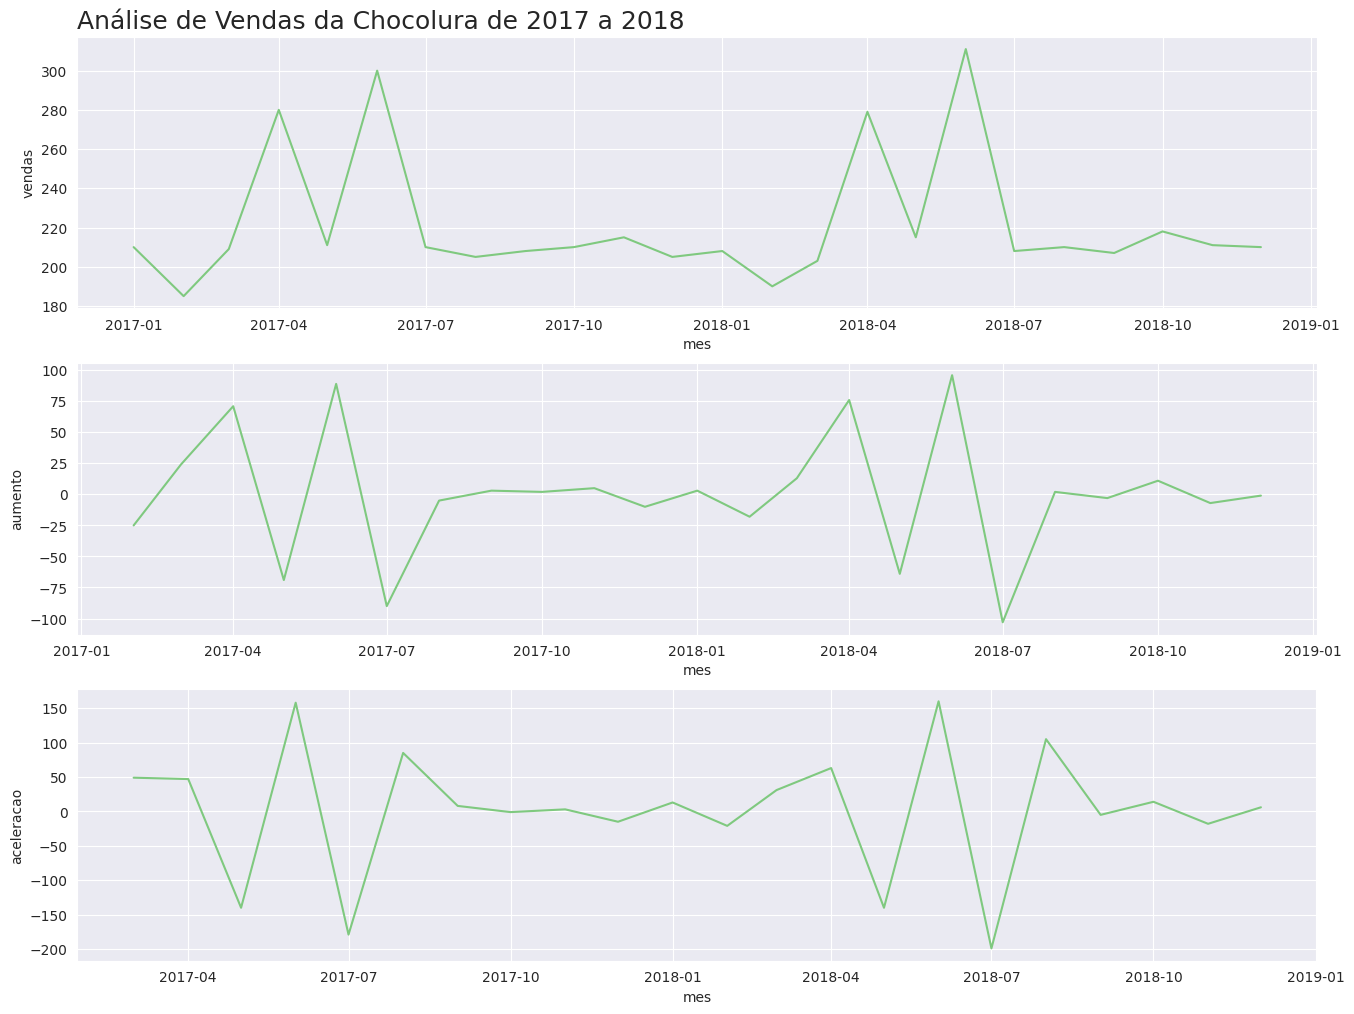

In [222]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de Vendas da Chocolura de 2017 a 2018')

## Vendas Diárias (Outubro e Novembro)

In [223]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [224]:
print('Quantidade de linhas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [225]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [226]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [227]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


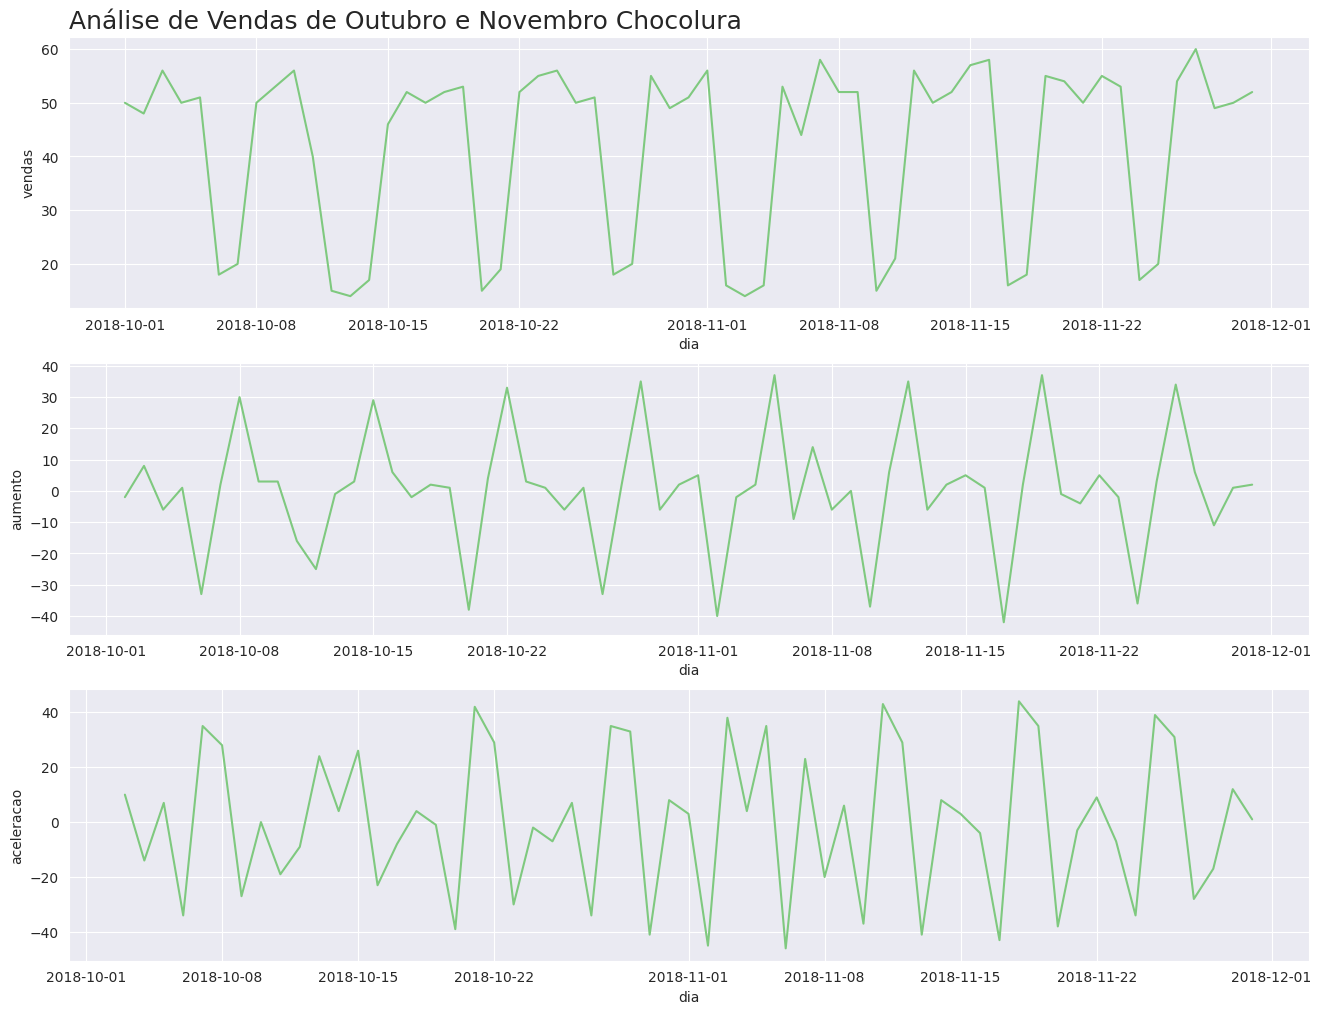

In [228]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro Chocolura')

### Analisando a Sazonalidade

In [229]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [230]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [231]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terca',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

In [232]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


### Agrupamento por Dias

In [233]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-233-38016381f919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [234]:
vendas_agrupadas.head()

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0


### Correlação das vendas diárias

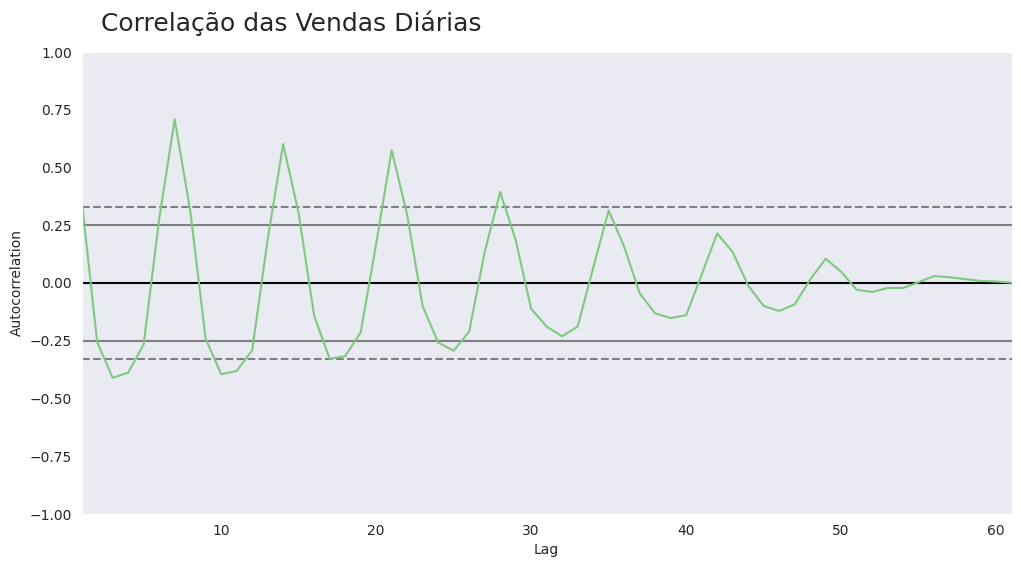

In [235]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

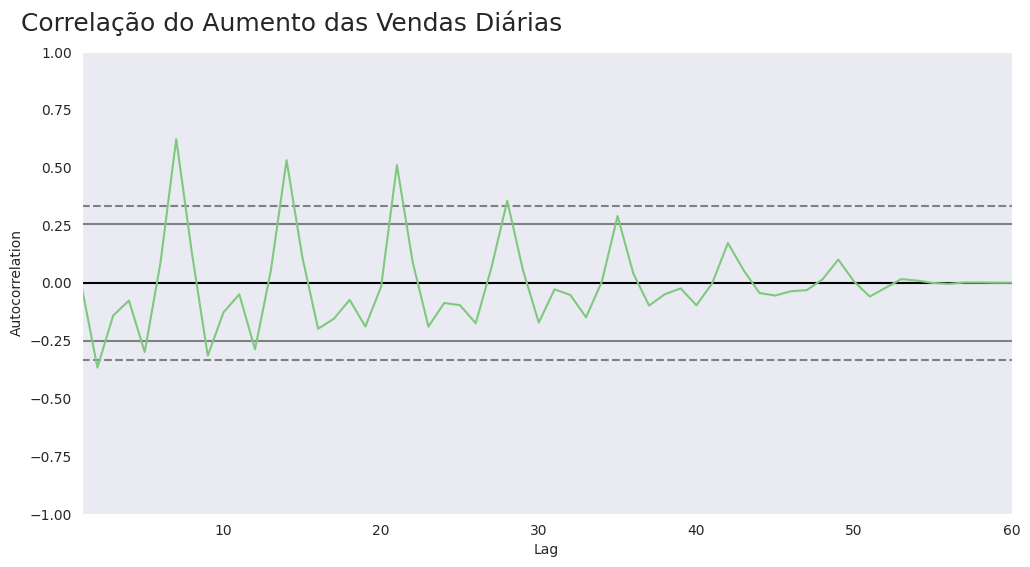

In [236]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

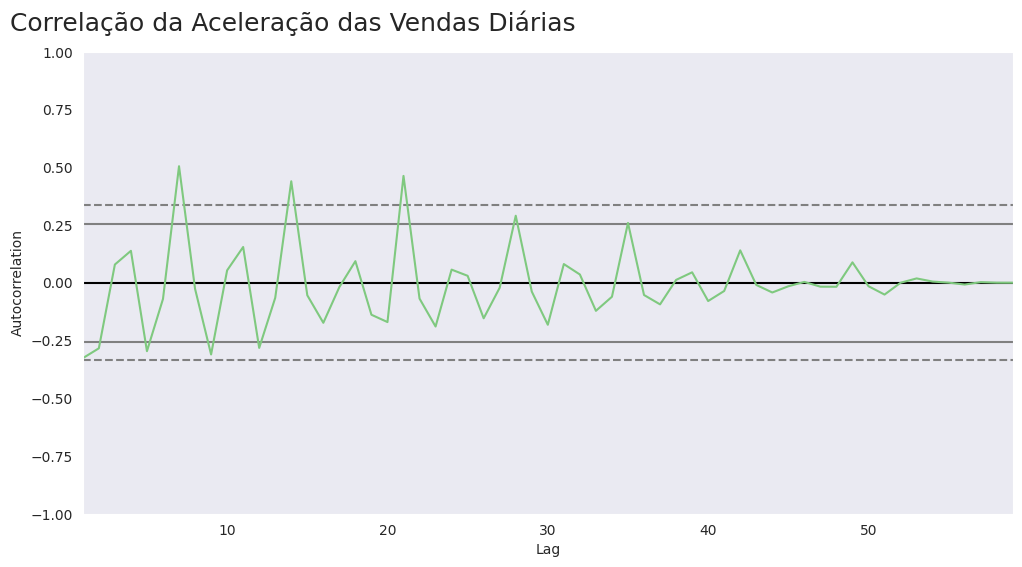

In [237]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [238]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [239]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [240]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [241]:
print('Quantidade de linhas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


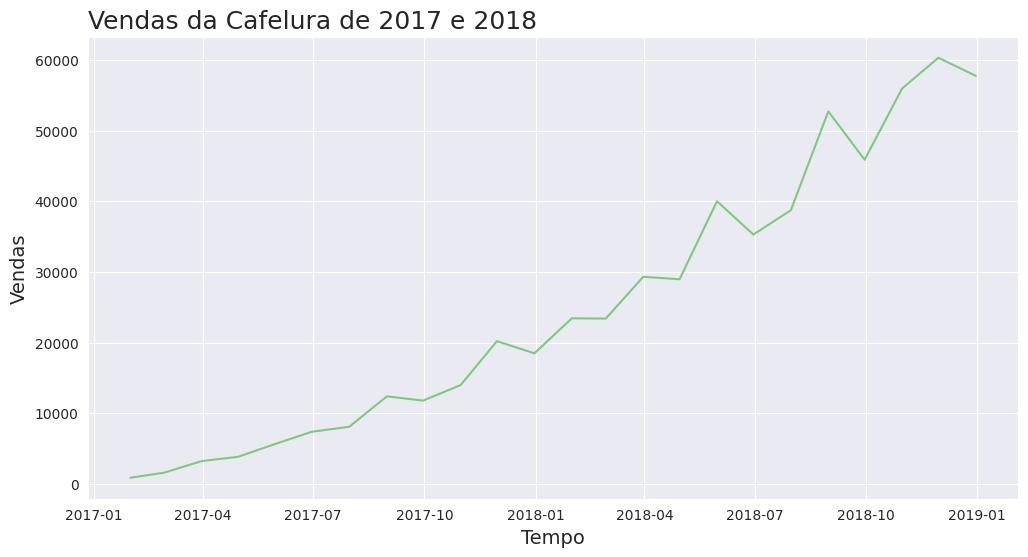

In [242]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [243]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [244]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [245]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


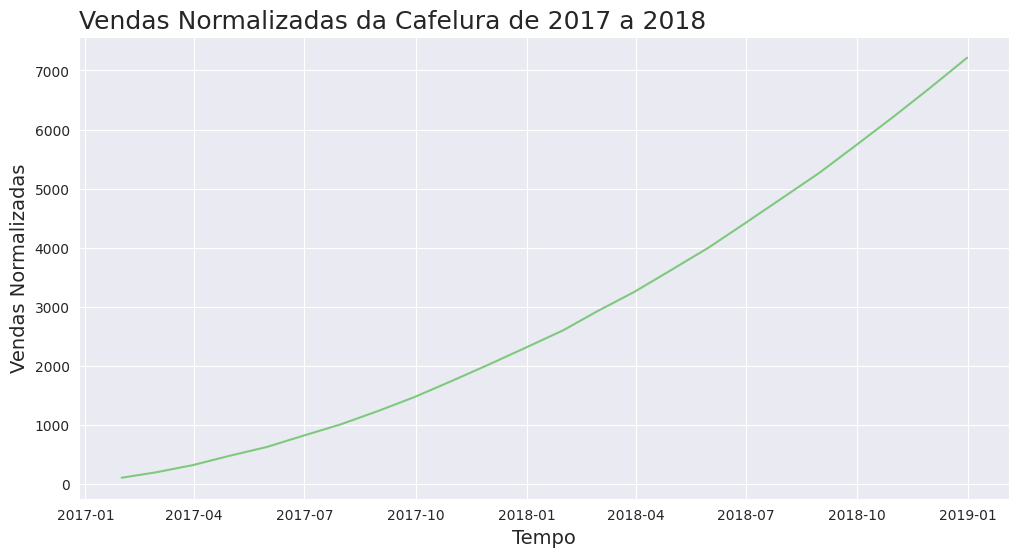

In [246]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

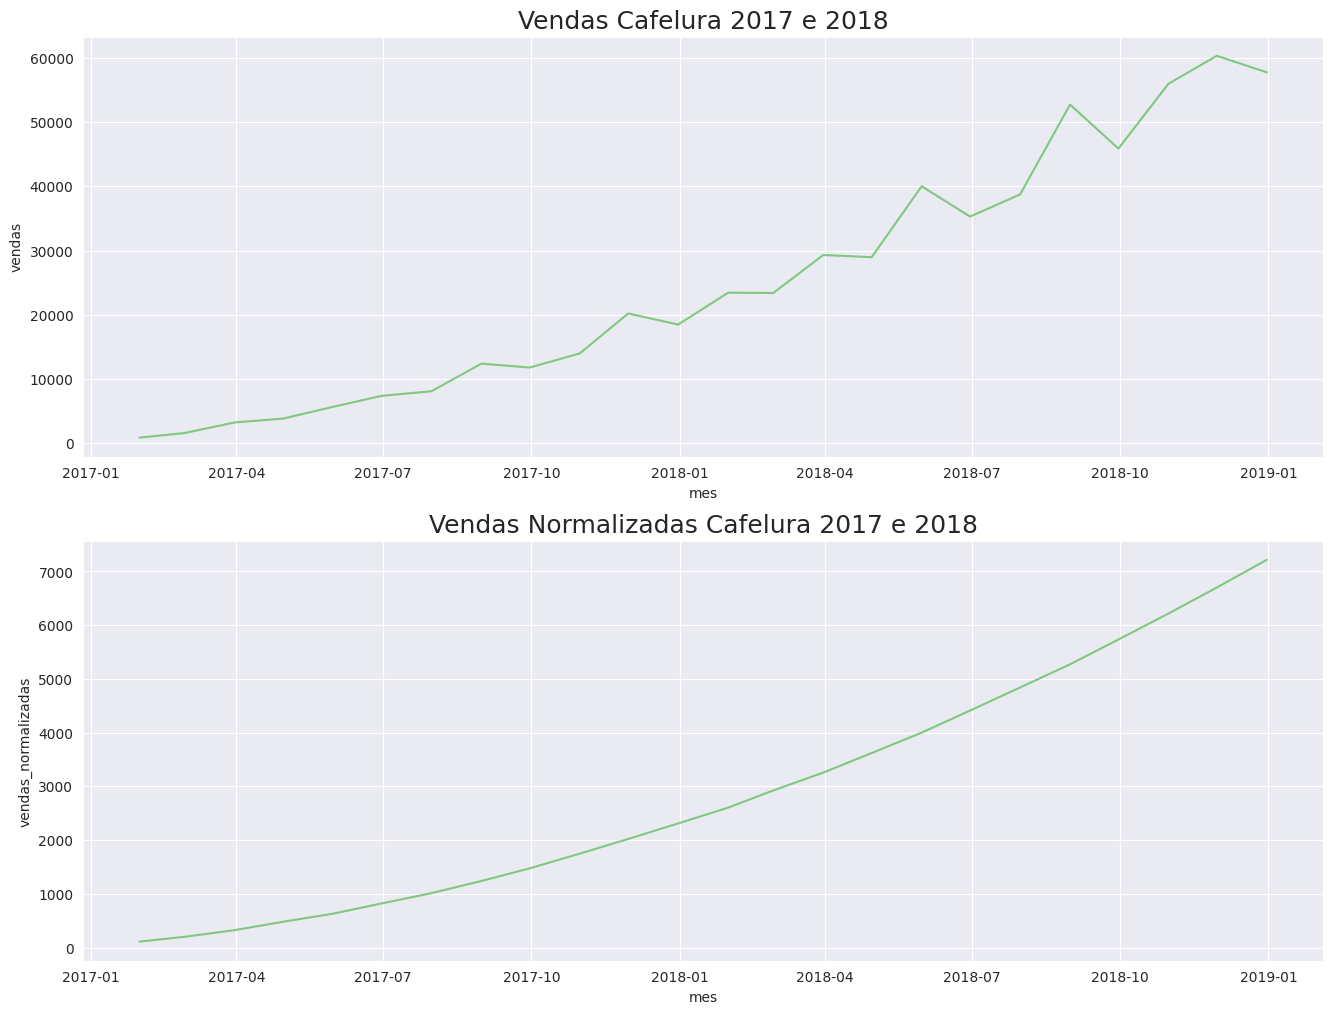

In [247]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose

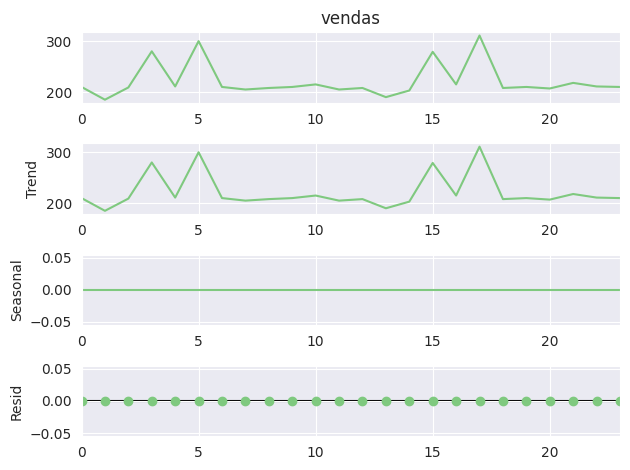

In [249]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

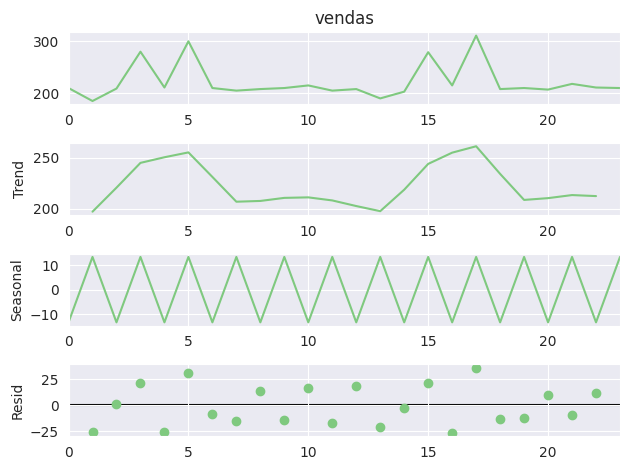

In [250]:
resultado = seasonal_decompose(chocolura['vendas'], period=2)
ax = resultado.plot()

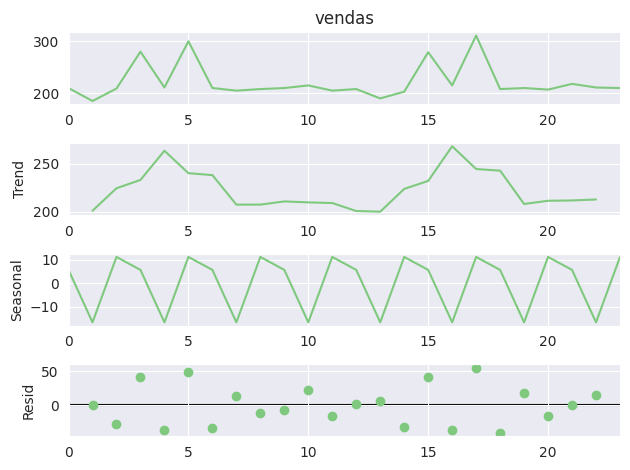

In [251]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

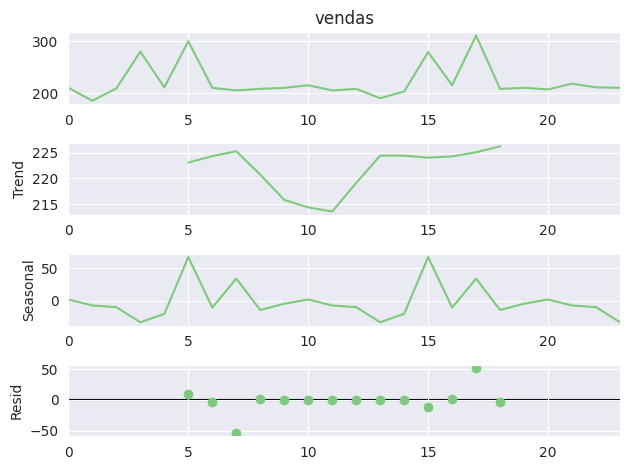

In [252]:
resultado = seasonal_decompose(chocolura['vendas'], period=10)
ax = resultado.plot()

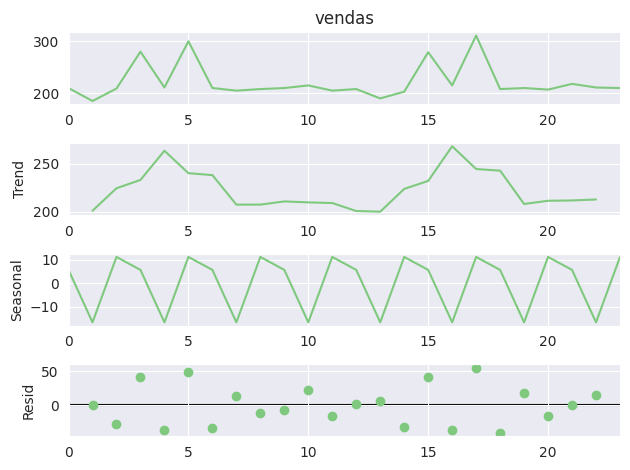

In [253]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [254]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [255]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


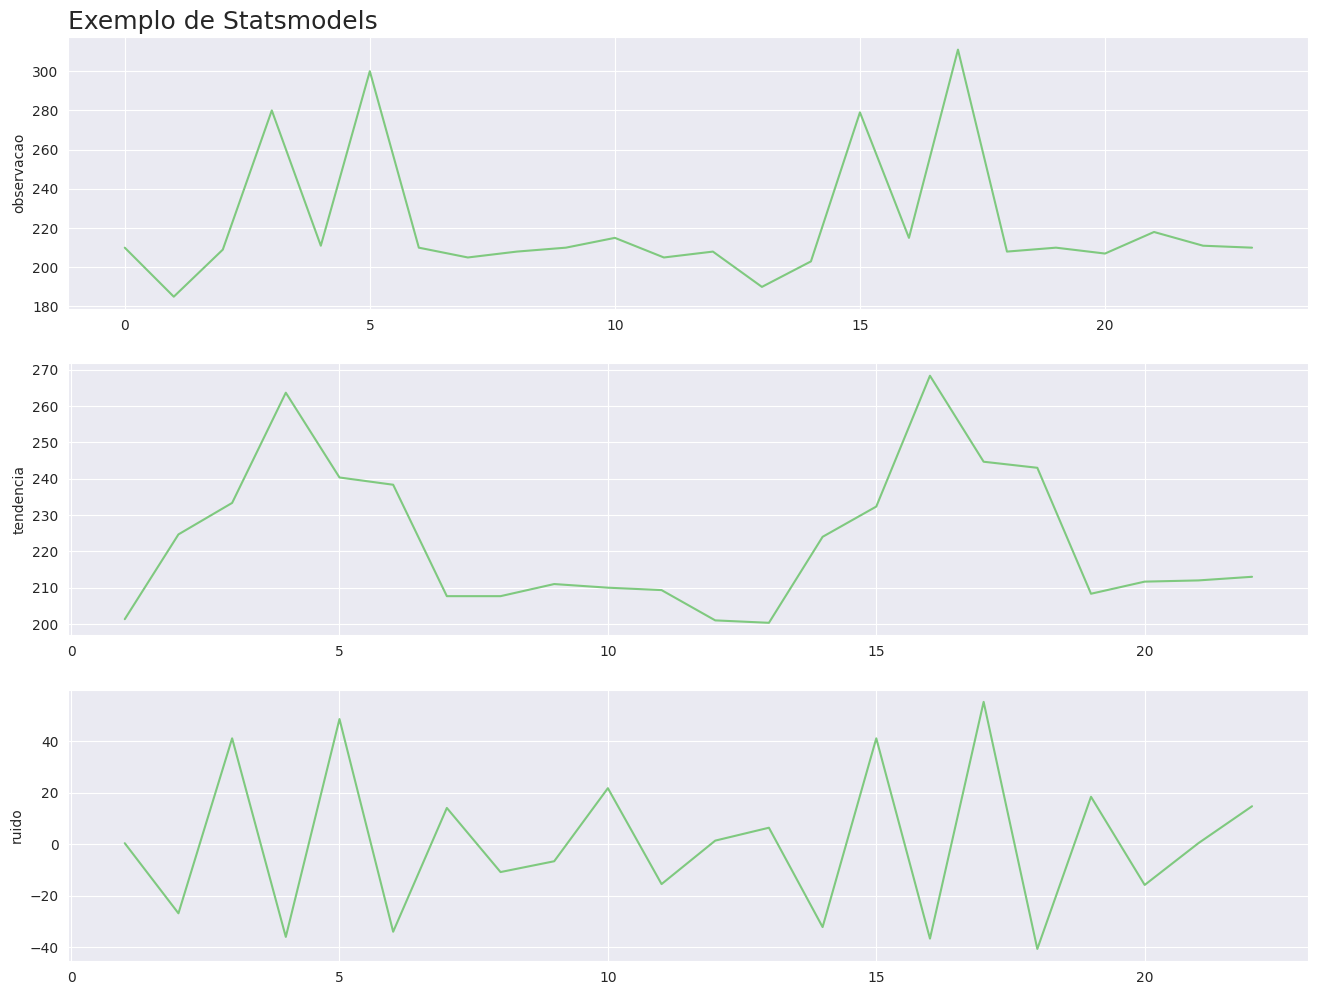

In [256]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

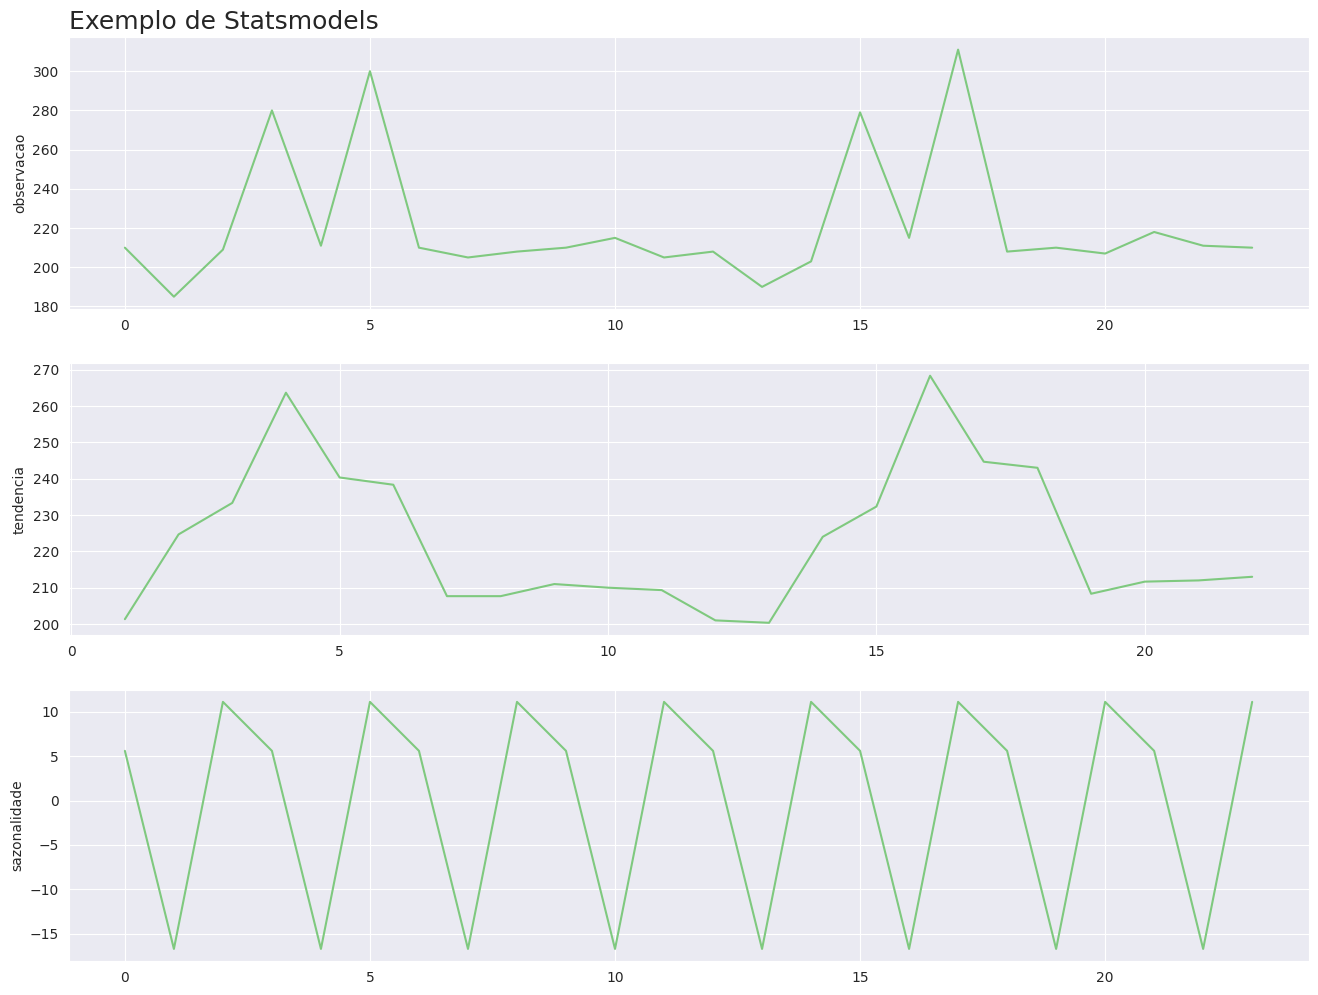

In [257]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de Vendas

In [258]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [259]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [260]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [261]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [262]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


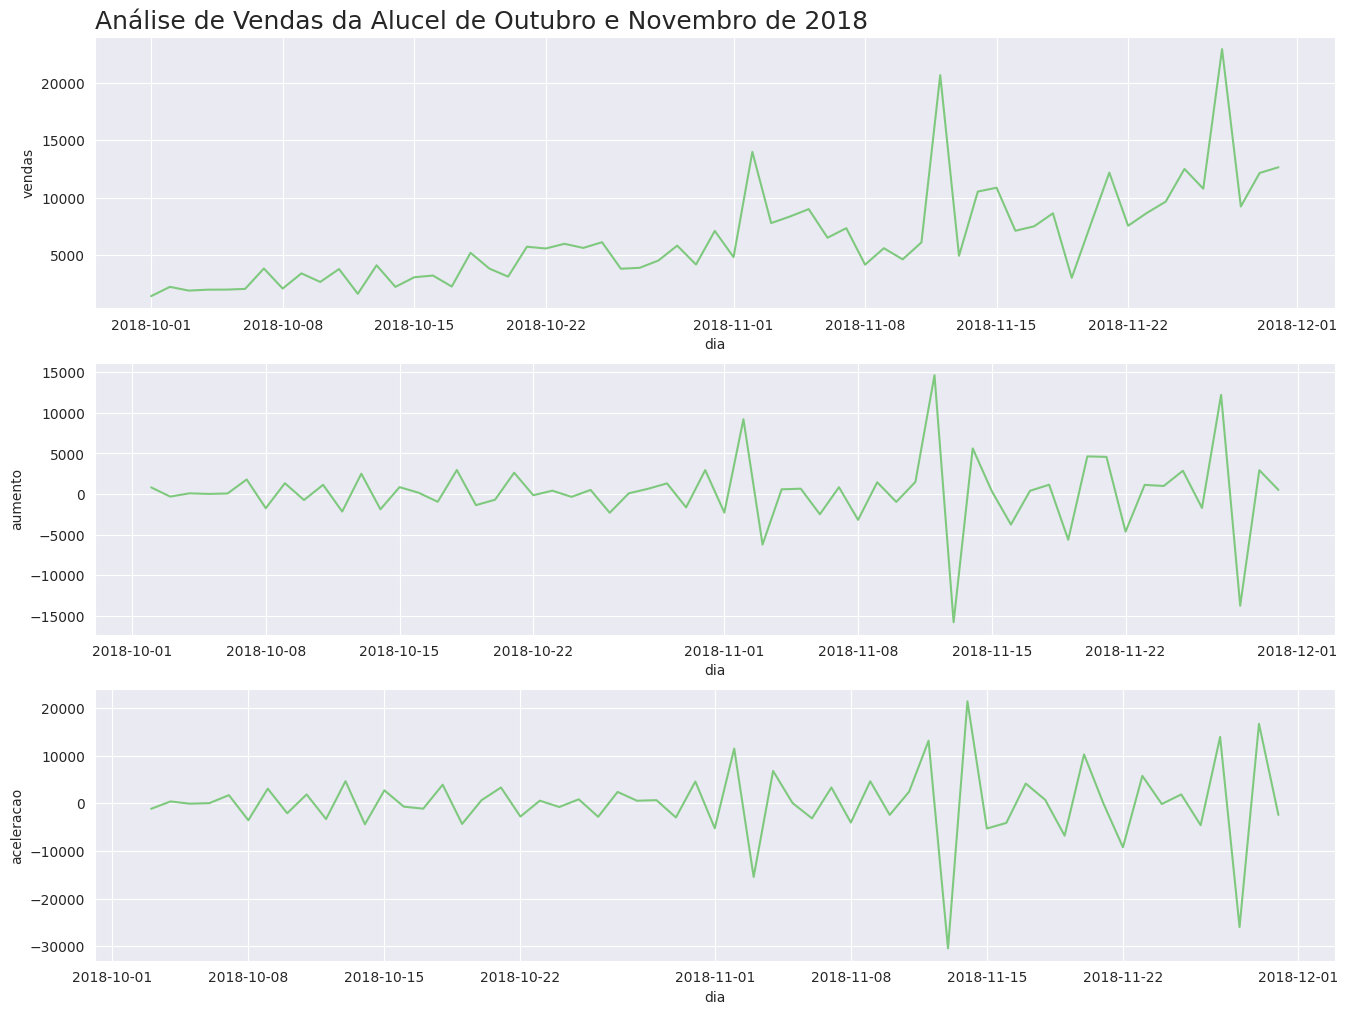

In [264]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

# Média Móvel

In [273]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


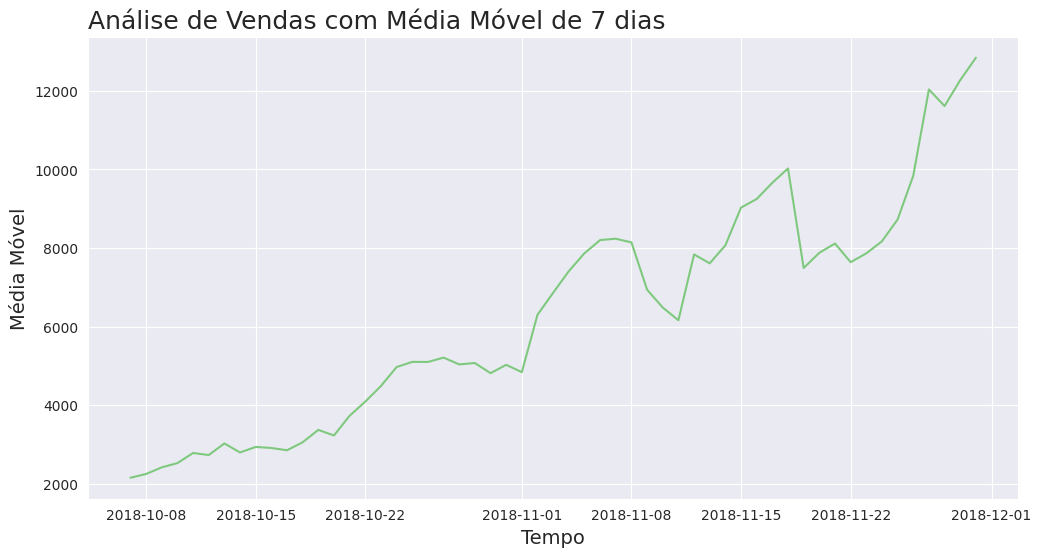

In [274]:
plotar('Análise de Vendas com Média Móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [275]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

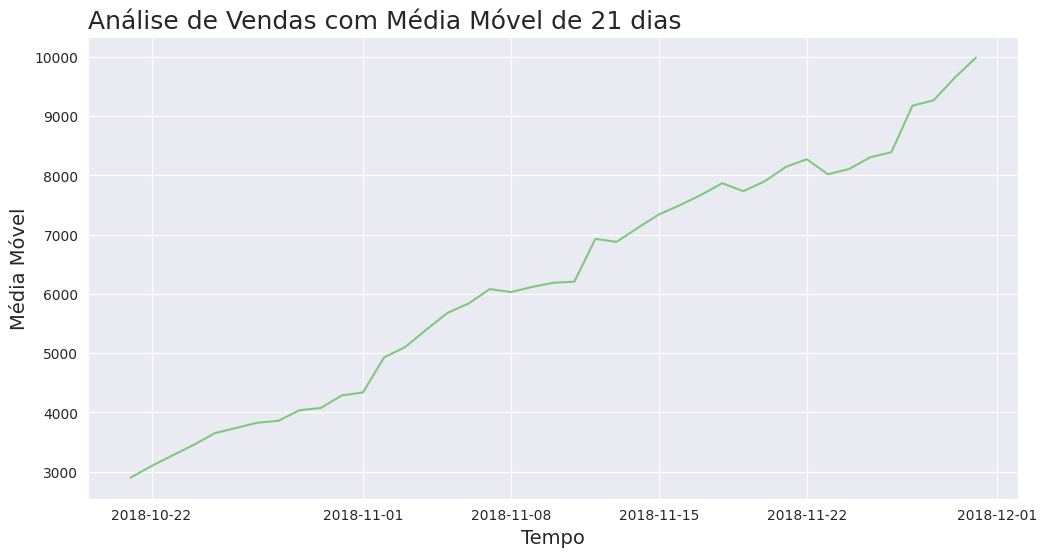

In [276]:
plotar('Análise de Vendas com Média Móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

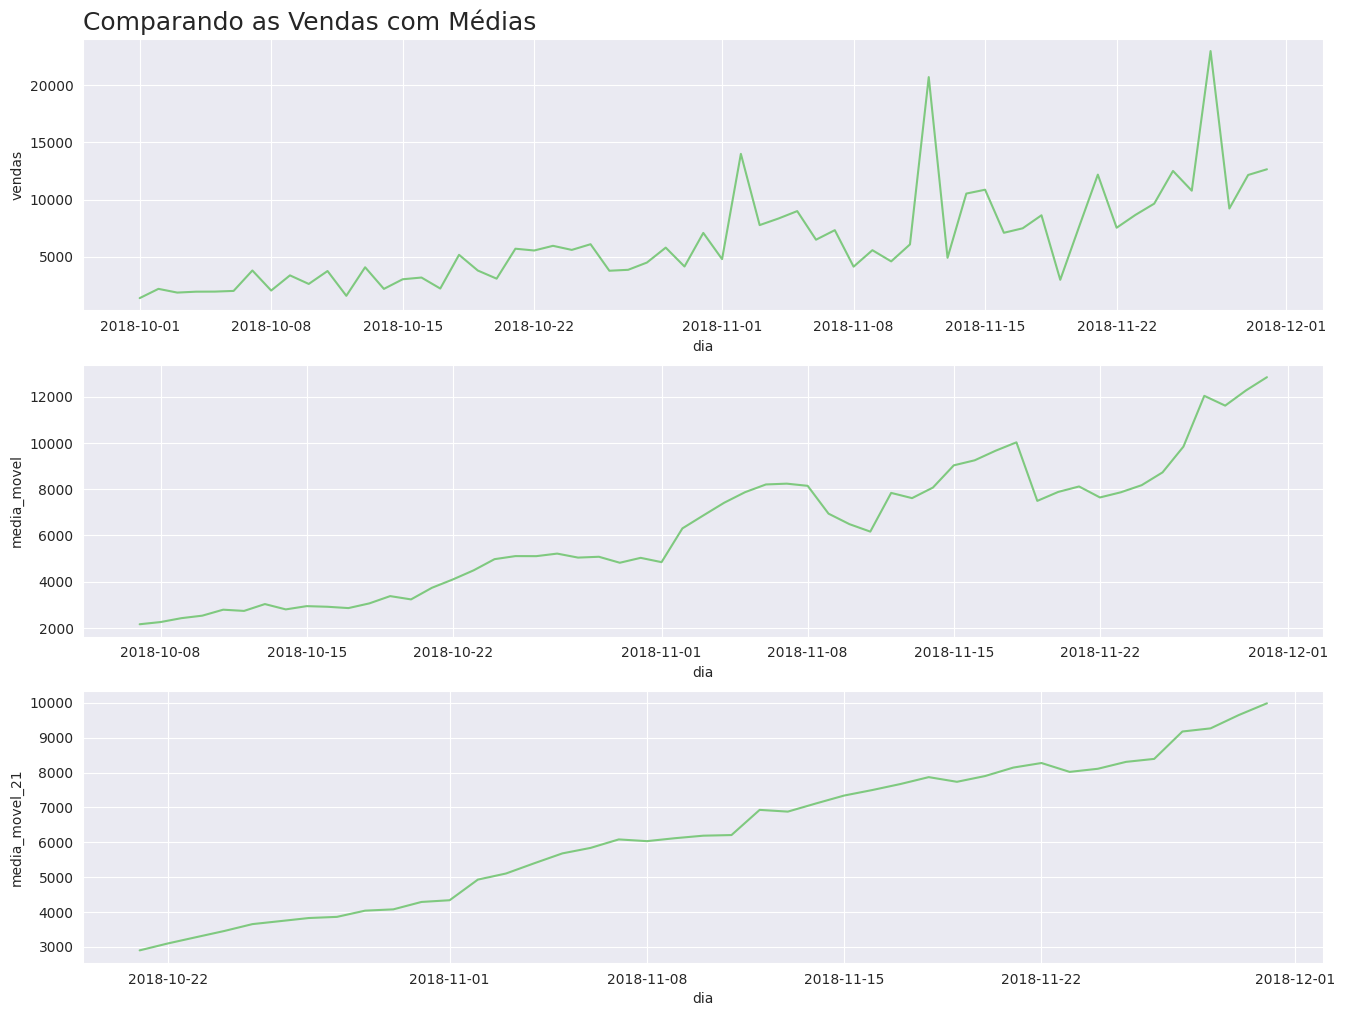

In [277]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as Vendas com Médias')